In [1]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
eda_df = pd.read_csv("./Raw_data/Files/eda_structuring_with_python_dataset1.csv")
eda_df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [5]:
eda_df["date"] = pd.to_datetime(eda_df["date"])

In [6]:
eda_df.shape

(3401012, 3)

In [7]:
eda_df_unique = eda_df.drop_duplicates()
eda_df_unique.shape

(3401012, 3)

In [8]:
eda_df.sort_values(by = "number_of_strikes", ascending= False).head(15)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


In [9]:
eda_df["center_point_geom"].value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.7 22.9)     107
POINT(-82.5 22.9)     107
POINT(-84.2 22.3)     106
                     ... 
POINT(-130.2 47.4)      1
POINT(-67.5 41.7)       1
POINT(-60.2 44.1)       1
POINT(-117.8 34.6)      1
POINT(-60.4 44.5)       1
Name: count, Length: 170855, dtype: int64

In [10]:
eda_df["center_point_geom"].value_counts()[:20].rename_axis("unique_values").reset_index(name="Counts").style.background_gradient(cmap="Reds")

,unique_values,Counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


In [11]:
eda_df["week"] = eda_df["date"].dt.isocalendar().week
eda_df.head()

,date,number_of_strikes,center_point_geom,week
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [12]:
eda_df["day_name"] = eda_df["date"].dt.day_name()
eda_df.head()

,date,number_of_strikes,center_point_geom,week,day_name
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


In [21]:
# Check the mean number of strikes by week day

str_by_day = eda_df.groupby("day_name", as_index = False)["number_of_strikes"].mean()
str_by_day

,day_name,number_of_strikes
0,Friday,13.349972
1,Monday,13.152804
2,Saturday,12.732694
3,Sunday,12.324717
4,Thursday,13.240594
5,Tuesday,13.813599
6,Wednesday,13.224568


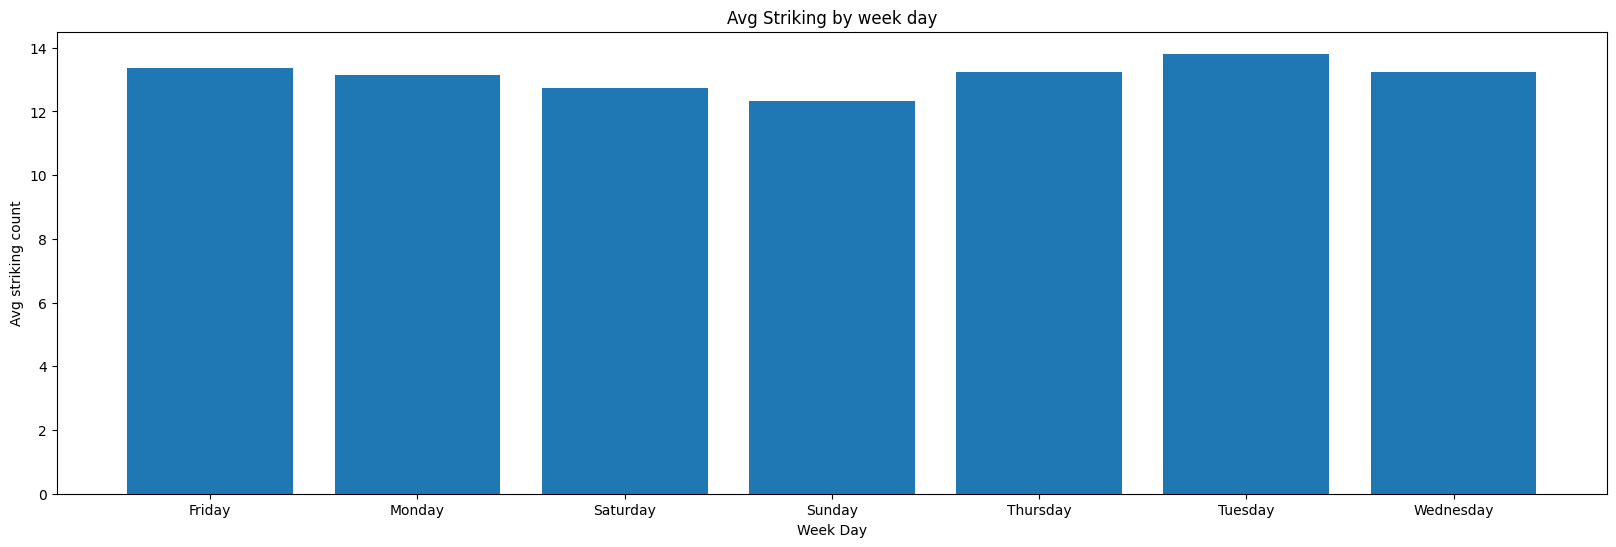

In [22]:
plt.figure(figsize=(20,6))
plt.bar(x=str_by_day["day_name"], height= str_by_day["number_of_strikes"])
plt.title("Avg Striking by week day")
plt.xlabel("Week Day")
plt.ylabel("Avg striking count")
plt.show()

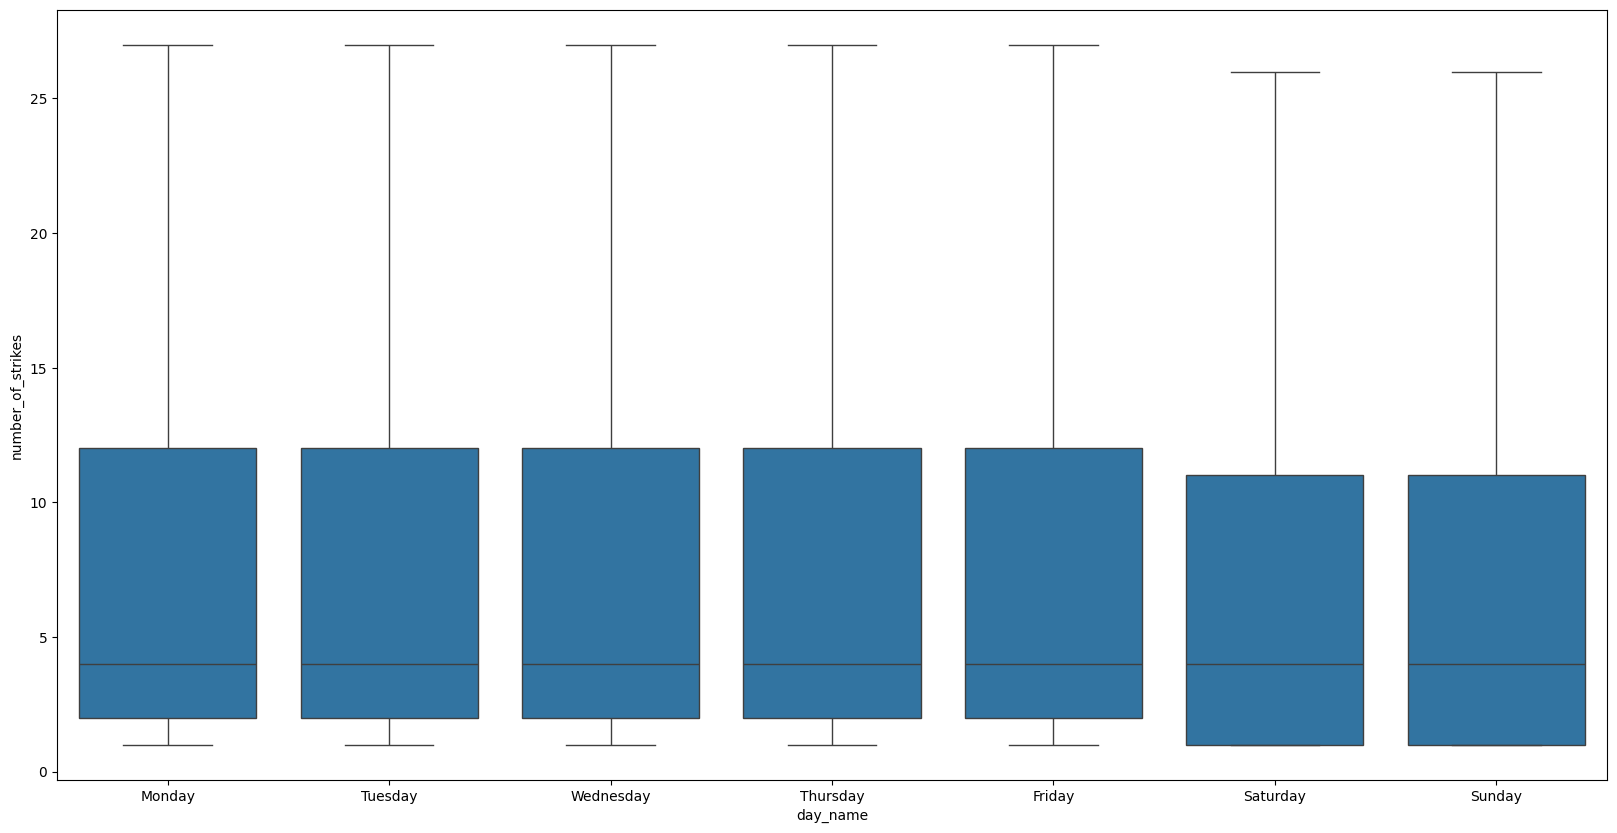

In [30]:
week_order = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(20,10))
box_plot = sns.boxplot( data= eda_df,
                       x = "day_name",
                       y = "number_of_strikes",
                       order = week_order,
                       showfliers = False)

